In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow_datasets as tfds
import datetime
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns




##Loading the data

In [ ]:
DATASET_NAME = 'rock_paper_scissors'
(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name = DATASET_NAME,
    data_dir ='tmp',
    with_info = True,
    as_supervised =True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST]
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteI74KRU/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteI74KRU/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [ ]:
def dataset_to_numpy(ds):
  
   images=[]
   labels=[]
   for i,(image,label) in enumerate(tfds.as_numpy(ds)):
      images.append(image)
      labels.append(label)

   for i,img in enumerate(images):
      if i<3:
          print(img.shape,labels[i])

   return images,labels   

##Split the dataset to train, validation and test sets

We already have splited the "roc paper scisser" data to "dataset_train_raw" and "dataset_test_raw" data sets when we had loaded the data, but here we are convering the the tensorfelow training and test datasets to numpy arrays and splitting the "dataset_test_raw" to validation and test sets, indicated as  "valid_images" and "test_images".



In [ ]:
train_images, train_labels = dataset_to_numpy(dataset_train_raw)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

valid_test_images, valid_test_labels = dataset_to_numpy(dataset_test_raw)
valid_test_images = np.array(valid_test_images)
valid_test_labels = np.array(valid_test_labels)

valid_images = valid_test_images[:186]
valid_labels = valid_test_labels[:186]
test_images = valid_test_images[186:]
test_labels = valid_test_labels[186:]


print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(300, 300, 3) 2
(300, 300, 3) 2
(300, 300, 3) 0
(300, 300, 3) 2
(300, 300, 3) 1
(300, 300, 3) 2
(2520, 300, 300, 3) (186, 300, 300, 3) (186, 300, 300, 3)
(2520,) (186,) (186,)


#Getting the number of classes

In [ ]:
num_classes = dataset_info.features['label'].num_classes
print(num_classes)

3


# Function to convert label ID to labels string.

In [ ]:
get_label_name = dataset_info.features['label'].int2str
print(get_label_name(0));
print(get_label_name(1));
print(get_label_name(2));

rock
paper
scissors


##Visualizing the traning dataset

In [ ]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for imgs in dataset.take(12):
        (image, label) = imgs
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

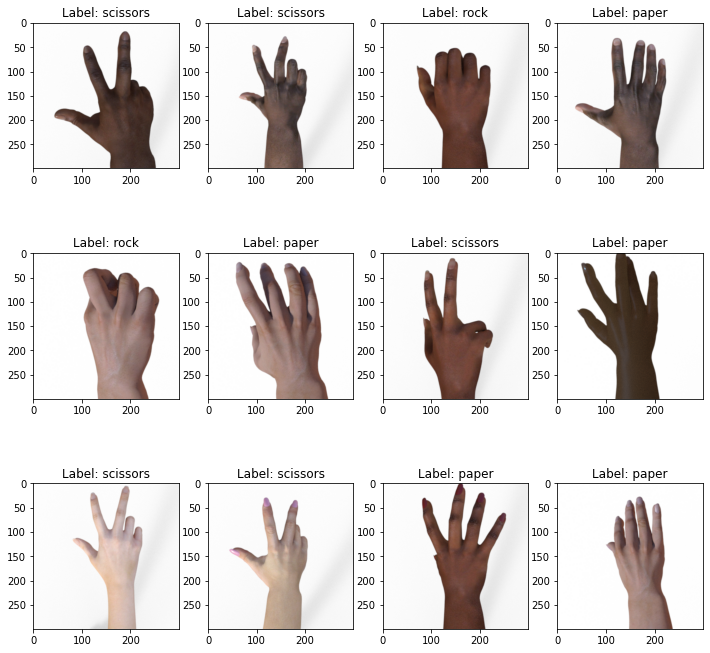

In [ ]:
preview_dataset(dataset_train_raw)

## Pre-processing the dataset

Here is the process that I would take to resize and normalize the dataset, which would be increase the accuracy of the model to up to 96 percent.
but as it was mentioned in the assignment task to do not manipulate the validation set (and as we cant normalize only the training set) I commented this part of code.

**Resizing**

In [ ]:
# INPUT_IMG_SIZE_ORIGINAL = dataset_info.features['image'].shape[0]
# INPUT_IMG_SHAPE_ORIGINAL = dataset_info.features['image'].shape

# INPUT_IMG_SIZE_REDUCED = INPUT_IMG_SIZE_ORIGINAL // 2
# INPUT_IMG_SHAPE_REDUCED = (
#     INPUT_IMG_SIZE_REDUCED,
#     INPUT_IMG_SIZE_REDUCED,
#     INPUT_IMG_SHAPE_ORIGINAL[2]
# )

# # Here we may switch between bigger or smaller image sized that we will train our model on.
# INPUT_IMG_SIZE = INPUT_IMG_SIZE_REDUCED
# INPUT_IMG_SHAPE = INPUT_IMG_SHAPE_REDUCED

# print('Input image size (original):', INPUT_IMG_SIZE_ORIGINAL)
# print('Input image shape (original):', INPUT_IMG_SHAPE_ORIGINAL)
# print('\n')
# print('Input image size (reduced):', INPUT_IMG_SIZE_REDUCED)
# print('Input image shape (reduced):', INPUT_IMG_SHAPE_REDUCED)
# print('\n')
# print('Input image size:', INPUT_IMG_SIZE)
# print('Input image shape:', INPUT_IMG_SHAPE)

**Normalization**

In [ ]:
# for i in dataset_train_raw:
#   print(i)
#   break

The above output indicates that the images are in de_normalized form and pixels values are between 0 to 254. in the below we are going to normalize the images using map() method, there 2 steps to be taken: 

1) Create a function to normalize the images

In [ ]:
# def normalize_image(image, label):
#       image= tf.cast(image, tf.float32) / 255.
#       image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
#       return image, label


2) Apply the normalize_image function to the train and test datasets using map() method

In [ ]:
# dataset_train_raw = dataset_train_raw.map(normalize_image)
# dataset_test_raw = dataset_test_raw.map(normalize_image)

In [ ]:
# for i in dataset_train_raw:
#   print(i)
#   break

In the above out put we sse images in normalized form and pixel values are betweeen 0 to 1 after applying normalize_image function to the dataset using map() method.

#Model

**Parameters**


***Epochs***:
When a whole dataset is transported forward and backward through the neural network ONCE, it is called an Epoch.
We also need to feed the entire dataset to the same neural network numerous times. Note that we're working with a small dataset, and we're utilizing Gradient Descent, an iterative method, to optimize the learning and the graph. As a result, simply updating the weights with a single pass or one epoch is not insufficient.
By increasing the number of epochs , the weights in the neural network are altered more frequently, and the curve shifts from underfitting to optimal to overfitting. 
The numbers of epochs can be varied from dataset to dataset.


<br>


***Batch size***:
The total numbers of training samples that present in a sing batch, called batch size. Note that the number of batchs and batch size are **not** the same.
As it mentioned above, we can't feed the complete dataset into the neural network at once. As a result, we divide the dataset into a certain number of batches, sets, or portions.


In [ ]:
BATCH_SIZE = 32

EPOCHS = 15

**Network**

In [ ]:
model = tf.keras.models.Sequential()

# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=(300,300,3),
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Fourth convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten the results to feed into dense layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

# Output layer.
model.add(tf.keras.layers.Dense(
    units=num_classes,
    activation=tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

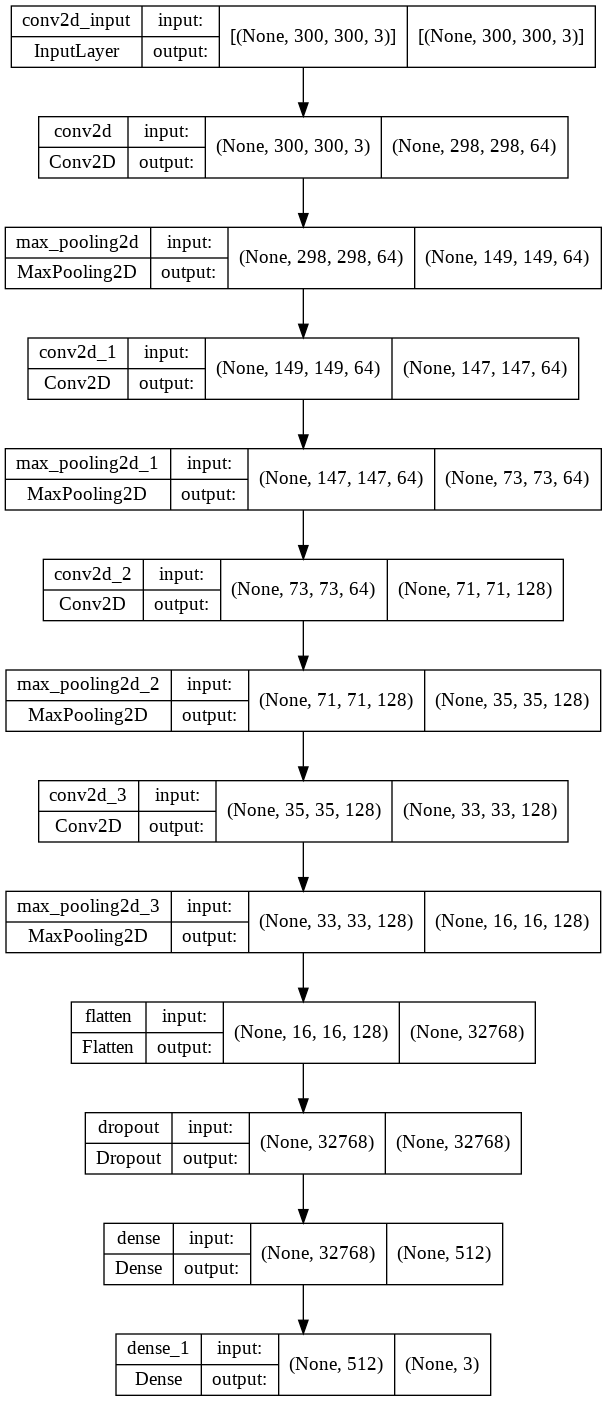

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiling The Model

In [ ]:
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
!rm -rf tmp/checkpoints
!rm -rf logs

In [ ]:
# Preparing callbacks.
os.makedirs('logs/fit', exist_ok=True)
tensorboard_log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1
)

os.makedirs('tmp/checkpoints', exist_ok=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy'
    # monitor='val_loss'
)

#Training the model by using training and validation sets

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=EPOCHS,
                    batch_size= BATCH_SIZE )

Epoch 1/15
79/79 [==============================] - 472s 6s/step - loss: 90.3214 - accuracy: 0.4833 - val_loss: 1.0097 - val_accuracy: 0.5161
Epoch 2/15
79/79 [==============================] - 473s 6s/step - loss: 5.7270 - accuracy: 0.5738 - val_loss: 0.8815 - val_accuracy: 0.5968
Epoch 3/15
79/79 [==============================] - 482s 6s/step - loss: 1.7859 - accuracy: 0.8794 - val_loss: 0.7993 - val_accuracy: 0.8656
Epoch 4/15
79/79 [==============================] - 482s 6s/step - loss: 0.5569 - accuracy: 0.9417 - val_loss: 2.2950 - val_accuracy: 0.7688
Epoch 5/15
79/79 [==============================] - 478s 6s/step - loss: 0.3713 - accuracy: 0.9619 - val_loss: 11.0212 - val_accuracy: 0.6129
Epoch 6/15
79/79 [==============================] - 480s 6s/step - loss: 0.1222 - accuracy: 0.9861 - val_loss: 2.8453 - val_accuracy: 0.8817
Epoch 7/15
79/79 [==============================] - 478s 6s/step - loss: 1.3020 - accuracy: 0.9798 - val_loss: 3.9825 - val_accuracy: 0.8441
Epoch 8/15


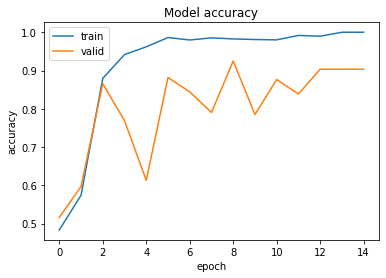

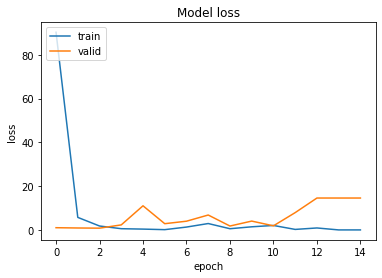

In [ ]:
from matplotlib import pyplot as plt

def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
display_history(history);

In [ ]:
assert max(history.history['val_accuracy']) > 0.90

#Evaluating the model by using the test set

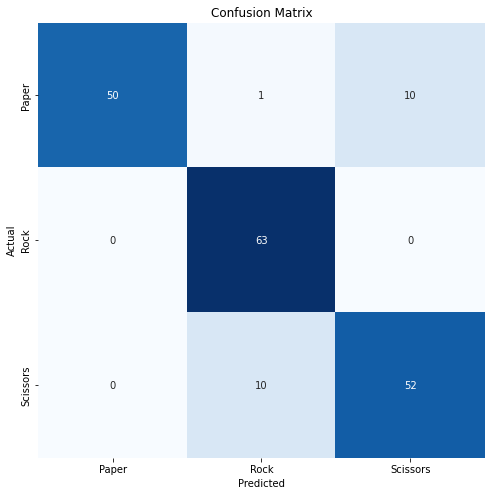

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       1.00      0.82      0.90        61
        Rock       0.85      1.00      0.92        63
    Scissors       0.84      0.84      0.84        62

    accuracy                           0.89       186
   macro avg       0.90      0.89      0.89       186
weighted avg       0.90      0.89      0.89       186



In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

AS it is shown above, the model has been accurately prdicting *paper*, out of 50 samples it has prdicted all correctly precision is 1.00(TP = TP +FP). 

How ever among *Rock* samples the model has predict negetively 10 as a Rock instead of scissors and 1 as rock which was actually paper, out of 74 total samples model had predicted 63 correctly.percision is 0.85.
As you can see recall is 1.00 here at that means TP = TP +FN, which means false negetive is zero, which makes sence beacuse the model has basically predicted all the samples as Rock(that is not good)

Among scisers samples model predicted possetive on 52 samples, model predicted 10 as scissors which were actually papere. predictions resulting precision 0.84.

As you can see evethogh model had a less negetive prediction on scissors but its precission is less than Rock,and that is beacouse the samples numbers are not even amonge our three classes, that could be also the reason model predicted paper with precision 1.00, as the number of papers's samples are the lowet among our three classes.

Over all the model is a good model with a high accuracy.

#Saving the model


In [ ]:
model_name = 'rock_paper_scissors_cnn.h5'
model.save(model_name, save_format='h5')